In [2]:
import pandas as pd
import numpy as np
file = '../../../DATA/OSA_class_bin.xlsx'
data = pd.read_excel(file)
df = pd.DataFrame(data)
df.head()
df = df.drop(['IAH','Smoker', 'Snorer', 'Illness'], axis=1)
df.set_index('Patient', inplace=True)
df.head()

,Gender,Weight,Height,Age,Cervical,OSA,BMI
Patient,,,,,,,
P0005,1,80,173,32,40,Healthy,26.729927
P0006,1,109,190,32,42,Healthy,30.193906
P0007,1,86,169,39,42,Severe,30.110991
P0008,1,145,172,47,44,Severe,49.012980
P0013,1,90,180,36,40,Healthy,27.777778


In [3]:
#Index transformation--> NO HACE FALTA (?)wtf
#LABEL ENCODING
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['OSA_label']=le.fit_transform(df['OSA'])
df.head()

#ONEHOT creo que no vale para target value
enc = preprocessing.OneHotEncoder()
# passing OSA cats column (label encoded values of bridge_types)
OSA_oneHot = pd.DataFrame(enc.fit_transform(df[['OSA']]).toarray())
# merge with main df on key values
df = df.join(OSA_oneHot)

In [4]:
df.head()

,Gender,Weight,Height,Age,Cervical,OSA,BMI,OSA_label,0,1
Patient,,,,,,,,,,
P0005,1,80,173,32,40,Healthy,26.729927,0,NaN,NaN
P0006,1,109,190,32,42,Healthy,30.193906,0,NaN,NaN
P0007,1,86,169,39,42,Severe,30.110991,1,NaN,NaN
P0008,1,145,172,47,44,Severe,49.012980,1,NaN,NaN
P0013,1,90,180,36,40,Healthy,27.777778,0,NaN,NaN


In [7]:
#features 
predictors = ['Gender','Weight', 'Height', 'Age', 'Cervical', 'BMI']

x = df[predictors].values
y = df['OSA_label'].values



# FUNCIONES PARA VISUALIZAR

In [6]:
import matplotlib.pyplot as plt
# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
outcomes = ['Healthy','Severe']

accuracies = []

# Logistic Regression
### Grid search

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {"C": np.logspace(-3,3,7), "penalty" : ["l1","l2"]}

logreg_2 = LogisticRegression()
logreg_2_cv = GridSearchCV(logreg_2,param_grid,cv = 10)
logreg_2_cv.fit(x,y)
print("tuned hyperparameters 1: (best parameters): ", logreg_2_cv.best_params_)
print("accuracy: ", logreg_2_cv.best_score_)



/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on th

tuned hyperparameters 1: (best parameters):  {'C': 0.001, 'penalty': 'l2'}
accuracy:  0.7321341463414635


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/beatrizesteban/opt/anaconda3/lib/python3.

Accuracy for logistic regression 1:  0.7224028906955735
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       242
           1       0.69      0.56      0.62       165

    accuracy                           0.72       407
   macro avg       0.72      0.70      0.70       407
weighted avg       0.72      0.72      0.72       407

Confusion matrix, without normalization
[[207  35]
 [ 76  89]]
              precision    recall  f1-score   support

           0       0.73      0.86      0.79       242
           1       0.72      0.54      0.62       165

    accuracy                           0.73       407
   macro avg       0.72      0.70      0.70       407
weighted avg       0.73      0.73      0.72       407

Accuracy for logistic regression 2:  0.7273110508882866
Area under the ROC:  0.6973829201101929
Average precision-recall score: 0.57


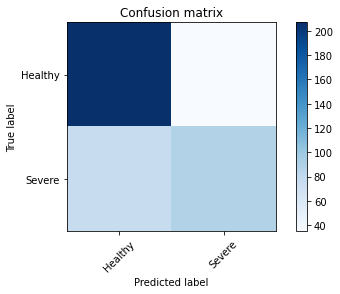

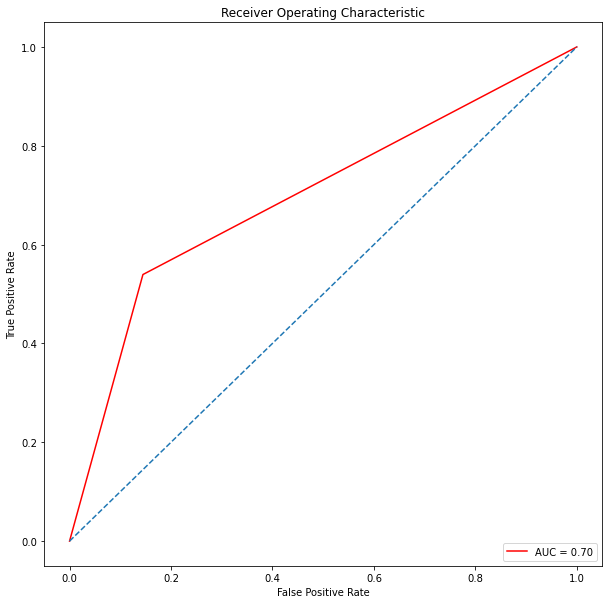

In [9]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate

log_reg_1 = LogisticRegression(penalty='l1', solver='saga')
log_reg_2 = LogisticRegression(C = 0.001, penalty='l2')
y_fit = cross_validate(log_reg_2,x, y)

accuracy_reg1 = cross_val_score(log_reg_1, x, y, cv = 5)
y_out1 = cross_val_predict(log_reg_1, x, y, cv=5)
report1=metrics.classification_report(y, y_out1)


print("Accuracy for logistic regression 1: ", np.average(accuracy_reg1))
print(report1)


accuracy_reg2 = cross_val_score(log_reg_2, x, y, cv = 5)
y_out2 = cross_val_predict(log_reg_2, x, y, cv=5)
report2=metrics.classification_report(y, y_out2)

### PLOT CONFUSION MATRIX ###
# Not normalized
cm = metrics.confusion_matrix(y, y_out2)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out2)
roc_auc_reg = auc(false_positive_rate, true_positive_rate)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_reg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_reg = average_precision_score(y, y_out2)

print(report2)
print("Accuracy for logistic regression 2: ", np.average(accuracy_reg2))
print("Area under the ROC: ", roc_auc_reg)
print('Average precision-recall score: {0:0.2f}'.format(average_precision_reg))

In [ ]:
accuracies.append(accuracy_reg)
print(accuracies)

In [ ]:
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(y_fit, x, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

# KNN

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_neighbors" :np.arange(1,50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid,cv = 10)
knn_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", knn_cv.best_params_)
print("accuracy: ", knn_cv.best_score_)

tuned hyperparameters: (best parameters):  {'n_neighbors': 9}
accuracy:  0.7566463414634146


Confusion matrix, without normalization
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       242
           1       0.69      0.64      0.66       165

    accuracy                           0.74       407
   macro avg       0.73      0.72      0.72       407
weighted avg       0.73      0.74      0.74       407

Average accuracy of KNN: 0.7370671484492621
Area under the ROC 0.722038567493113
Average precision-recall score: 0.59


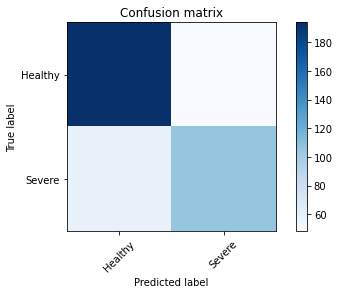

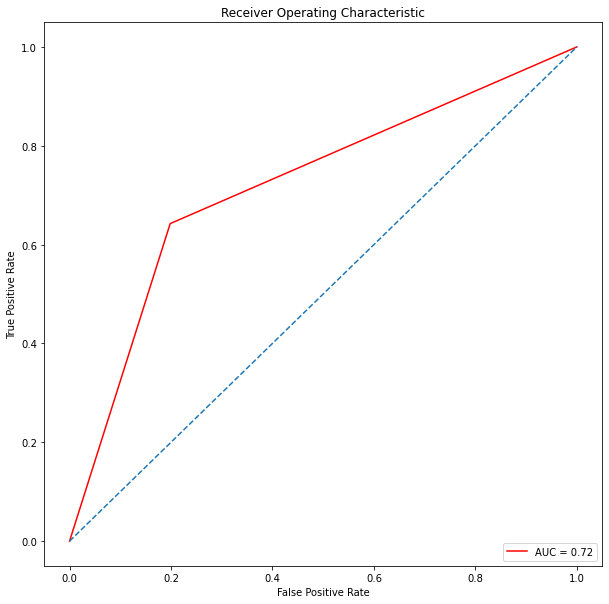

In [45]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import model_selection

knn1 = KNeighborsClassifier(n_neighbors=9)
accuracy_knn = cross_val_score(knn1, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(knn1, x, y, cv=5)
report_knn = metrics.classification_report(y, y_out)

#Compute roc_auc
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)

from sklearn.metrics import average_precision_score
average_precision_knn = average_precision_score(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
plt.figure()
plot_confusion_matrix(cm, outcomes)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


print(report_knn)
print('Average accuracy of KNN:', np.average(accuracy_knn))
print ("Area under the ROC", roc_auc_knn)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_knn))

In [47]:
print(accuracy_knn)

[0.77 0.72 0.72 0.74 0.74]


In [ ]:
accuracies.append(accuracy_knn)
print(accuracies)
plt.plot(accuracies)

# SVM

### Linear

Confusion matrix, without normalization
[[213  29]
 [ 90  75]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78       242
           1       0.72      0.45      0.56       165

    accuracy                           0.71       407
   macro avg       0.71      0.67      0.67       407
weighted avg       0.71      0.71      0.69       407

Average accuracy of svm: 0.7075579644685336
Area under the ROC: 0.6673553719008265
Average precision-recall score: 0.55


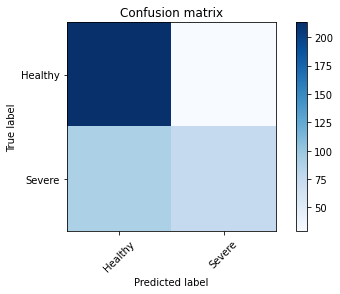

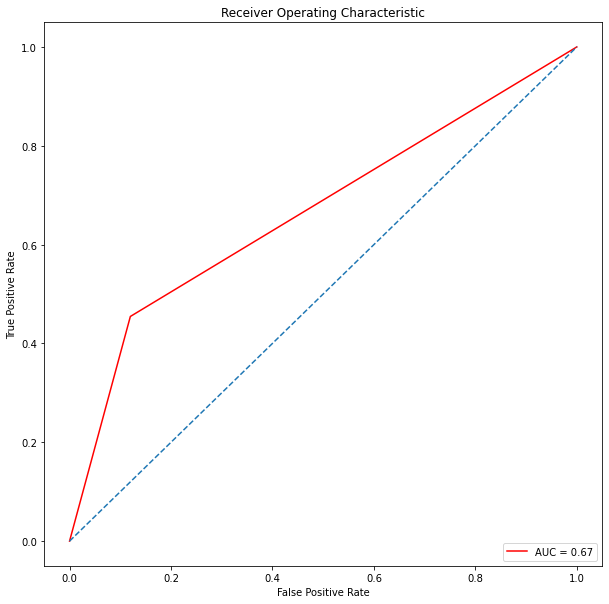

In [12]:
from sklearn.svm import SVC
svm = SVC()
accuracy_svm = cross_val_score(svm, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(svm, x, y, cv=5)
#Report 
report_svm = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_svm = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_svm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_svm = average_precision_score(y, y_out)

print(report_svm)
print('Average accuracy of svm:', np.average(accuracy_svm))
print ("Area under the ROC:", roc_auc_svm)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_svm))


# Decision Tree

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth" :np.arange(0,7)}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree,param_grid,cv = 10)
tree_cv.fit(x,y)

print("tuned hyperparameters: (best parameters): ", tree_cv.best_params_)
print("accuracy: ", tree_cv.best_score_)

tuned hyperparameters: (best parameters):  {'max_depth': 4}
accuracy:  0.7271951219512196


/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 277, in fit
    raise ValueError("max_depth must be greater than zero. ")
ValueError: max_depth must be greater than zero. 

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/beatrizesteban/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:54

### default

Confusion matrix, without normalization
[[173  69]
 [ 73  92]]
              precision    recall  f1-score   support

           0       0.70      0.71      0.71       242
           1       0.57      0.56      0.56       165

    accuracy                           0.65       407
   macro avg       0.64      0.64      0.64       407
weighted avg       0.65      0.65      0.65       407

Average accuracy of tree: 0.6465823547124361
Area under the ROC 0.6362258953168044
Average precision-recall score: 0.50


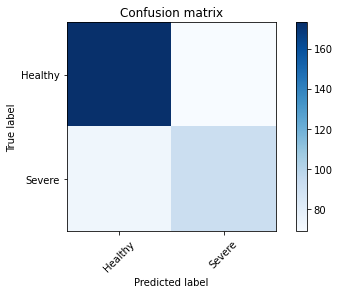

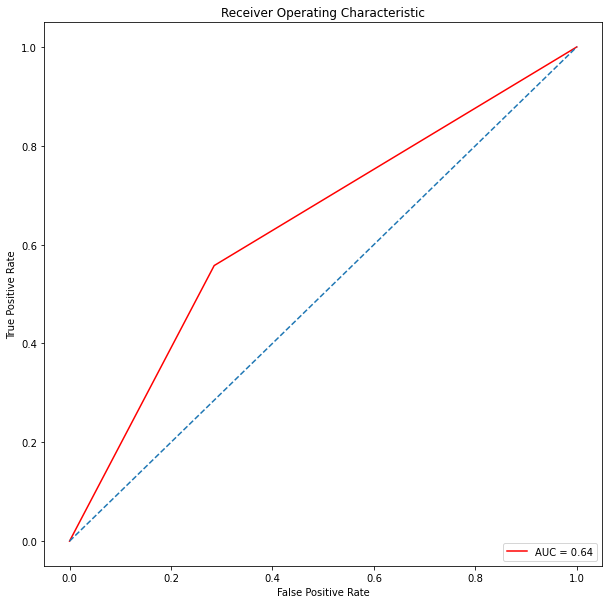

In [14]:
tree = DecisionTreeClassifier()
accuracy_tree = cross_val_score(tree, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(tree, x, y, cv=5)
#Report 
report_tree = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_tree = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_tree = average_precision_score(y, y_out)

print(report_tree)
print('Average accuracy of tree:', np.average(accuracy_tree))
print ("Area under the ROC", roc_auc_tree)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tree))

### 4 = max_depth

Confusion matrix, without normalization
[[181  61]
 [ 61 104]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       242
           1       0.63      0.63      0.63       165

    accuracy                           0.70       407
   macro avg       0.69      0.69      0.69       407
weighted avg       0.70      0.70      0.70       407

Average accuracy of tree: 0.700511894007829
Area under the ROC 0.6891184573002755
Average precision-recall score: 0.55


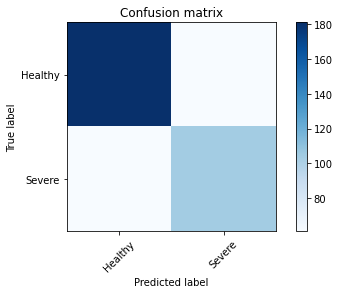

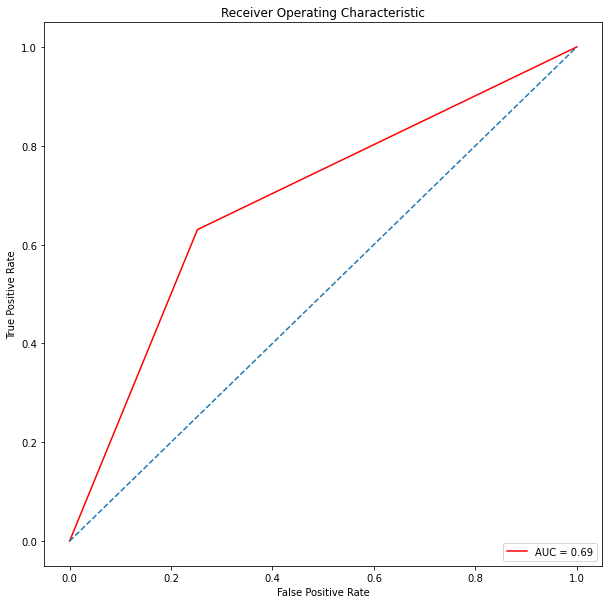

In [15]:
tree = DecisionTreeClassifier(max_depth=4)
accuracy_tree = cross_val_score(tree, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(tree, x, y, cv=5)
#Report 
report_tree = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_tree = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_tree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

from sklearn.metrics import average_precision_score
average_precision_tree = average_precision_score(y, y_out)

print(report_tree)
print('Average accuracy of tree:', np.average(accuracy_tree))
print ("Area under the ROC", roc_auc_tree)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_tree))

# Ensemble learning

### intento comparar diferentes ensembles: random forest, adaboosting, gradient boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

forest = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(100, 150)}
forest_cv = GridSearchCV(forest,param_grid,cv = 5)
forest_cv.fit(x,y)
print("tuned hyperparameters forest: (best parameters): ", forest_cv.best_params_)





In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

ada = AdaBoostClassifier()
param_grid = {'n_estimators': np.arange(50, 100)}
ada_cv = GridSearchCV(ada,param_grid,cv = 5)
ada_cv.fit(x,y)
print("tuned hyperparameters ada: (best parameters): ", ada_cv.best_params_)


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

gradient = GradientBoostingClassifier()
param_grid = {'n_estimators': np.arange(100, 200), 'learning_rate': np.arange(0.1, 0.5)}
gradient_cv = GridSearchCV(gradient,param_grid,cv = 5)
gradient_cv.fit(x,y)
print("tuned hyperparameters gradient: (best parameters): ", gradient_cv.best_params_)


tuned hyperparameters gradient: (best parameters):  {'learning_rate': 0.1, 'n_estimators': 102}


In [ ]:
acc_ensemble = pd.DataFrame({'Random Forest': [],
                        'Ada Boosting':   [],
                        'Gradient Boostin': []})

In [ ]:
acc_ensemble

In [ ]:
acc = pd.DataFrame(index=['Random Forest', 'Ada Boosting', 'Gradient Boosting'])
acc

Confusion matrix, without normalization
[[183  59]
 [ 62 103]]
              precision    recall  f1-score   support

           0       0.75      0.76      0.75       242
           1       0.64      0.62      0.63       165

    accuracy                           0.70       407
   macro avg       0.69      0.69      0.69       407
weighted avg       0.70      0.70      0.70       407

Average accuracy of tree: 0.7274013851249623
Area under the ROC 0.6902203856749312
Average precision-recall score: 0.55


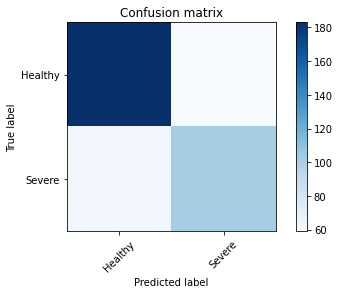

In [50]:
forest = RandomForestClassifier(n_estimators=135)
accuracy_forest = cross_val_score(forest, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(forest, x, y, cv=5)
#Report 
report_forest = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_1, true_positive_rate_1, thresholds = roc_curve(y, y_out)
roc_auc_forest = auc(false_positive_rate_1, true_positive_rate_1)


from sklearn.metrics import average_precision_score
average_precision_forest = average_precision_score(y, y_out)

print(report_forest)
print('Average accuracy of tree:', np.average(accuracy_forest))
print ("Area under the ROC", roc_auc_forest)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_forest))

Confusion matrix, without normalization
[[193  49]
 [ 75  90]]
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       242
           1       0.65      0.55      0.59       165

    accuracy                           0.70       407
   macro avg       0.68      0.67      0.67       407
weighted avg       0.69      0.70      0.69       407

Average accuracy of tree: 0.6953327311050888
Area under the ROC 0.6714876033057852
Average precision-recall score: 0.54


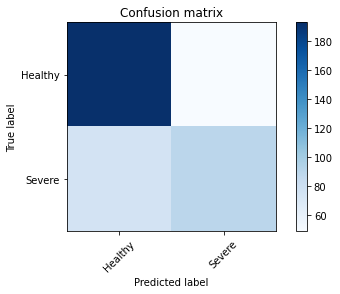

In [27]:
ada = AdaBoostClassifier(n_estimators=51)
accuracy_ada = cross_val_score(ada, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(ada, x, y, cv=5)
#Report 
report_ada = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_2, true_positive_rate_2, thresholds = roc_curve(y, y_out)
roc_auc_ada = auc(false_positive_rate_2, true_positive_rate_2)

from sklearn.metrics import average_precision_score
average_precision_ada = average_precision_score(y, y_out)

print(report_ada)
print('Average accuracy of tree:', np.average(accuracy_ada))
print ("Area under the ROC", roc_auc_ada)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_ada))

Confusion matrix, without normalization
[[185  57]
 [ 60 105]]
              precision    recall  f1-score   support

           0       0.76      0.76      0.76       242
           1       0.65      0.64      0.64       165

    accuracy                           0.71       407
   macro avg       0.70      0.70      0.70       407
weighted avg       0.71      0.71      0.71       407

Average accuracy of tree: 0.7150858175248419
Area under the ROC 0.7004132231404958
Average precision-recall score: 0.56


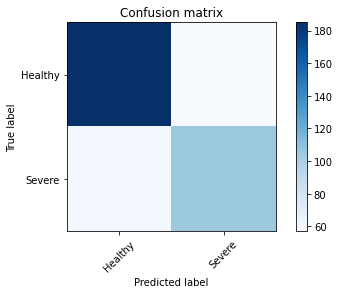

In [28]:
grad = GradientBoostingClassifier(n_estimators=102)
accuracy_grad = cross_val_score(grad, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(grad, x, y, cv=5)
#Report 
report_grad = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate_3, true_positive_rate_3, thresholds = roc_curve(y, y_out)
roc_auc_grad = auc(false_positive_rate_3, true_positive_rate_3)


from sklearn.metrics import average_precision_score
average_precision_grad = average_precision_score(y, y_out)

print(report_grad)
print('Average accuracy of tree:', np.average(accuracy_grad))
print ("Area under the ROC", roc_auc_grad)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_grad))

Text(0.5, 0, 'False Positive Rate')

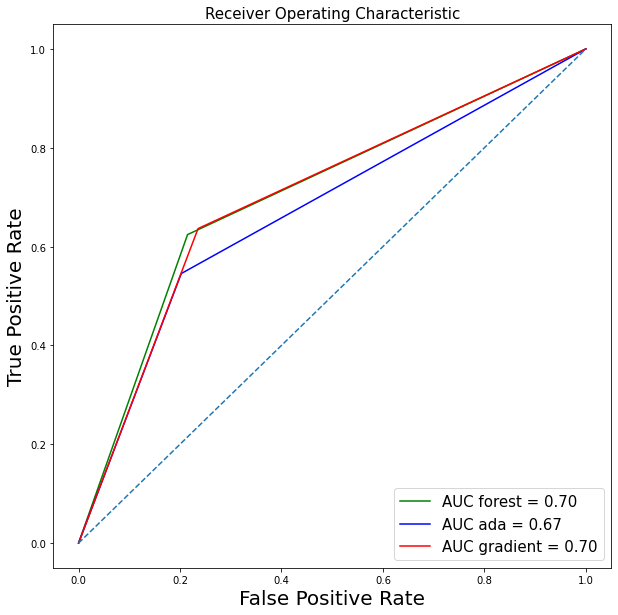

In [40]:
# Plot ROC of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic', fontsize = 15)
plt.plot(false_positive_rate_1,true_positive_rate_1, color='green',label = 'AUC forest = %0.2f' % roc_auc_forest)
plt.plot(false_positive_rate_2,true_positive_rate_2, color='blue',label = 'AUC ada = %0.2f' % roc_auc_ada)
plt.plot(false_positive_rate_3,true_positive_rate_3, color='red',label = 'AUC gradient = %0.2f' % roc_auc_grad)
plt.legend(loc = 'lower right', fontsize=15)
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=20)


Text(0, 0.5, 'Accuracy')

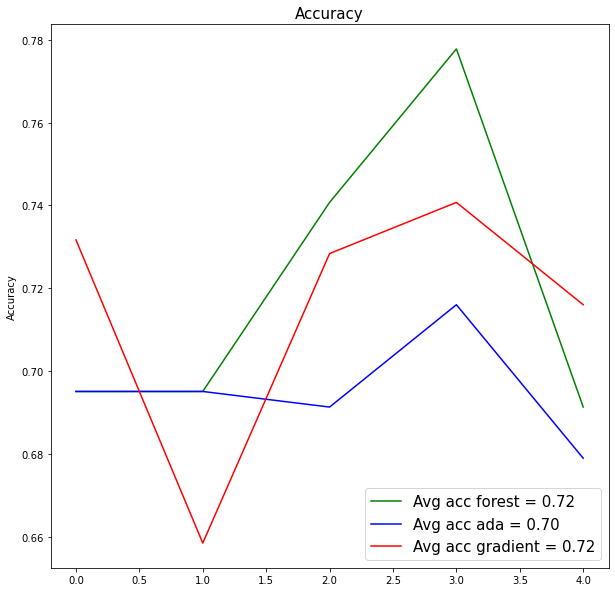

In [37]:
# Plot accuracy of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Accuracy', fontsize = 15)
plt.plot(accuracy_forest, color='green',label = 'Avg acc forest = %0.2f' % np.average(accuracy_forest))
plt.plot(accuracy_ada, color='blue',label = 'Avg acc ada = %0.2f' % np.average(accuracy_ada))
plt.plot(accuracy_grad, color='red',label = 'Avg acc gradient = %0.2f' % np.average(accuracy_grad))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('Accuracy')


Confusion matrix, without normalization
[[194  48]
 [ 62 103]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       242
           1       0.68      0.62      0.65       165

    accuracy                           0.73       407
   macro avg       0.72      0.71      0.72       407
weighted avg       0.73      0.73      0.73       407

Average accuracy of tree: 0.7150557061126167
Area under the ROC 0.7129476584022039
Average precision-recall score: 0.58


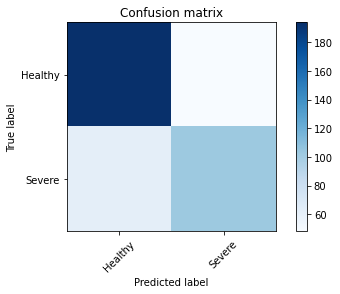

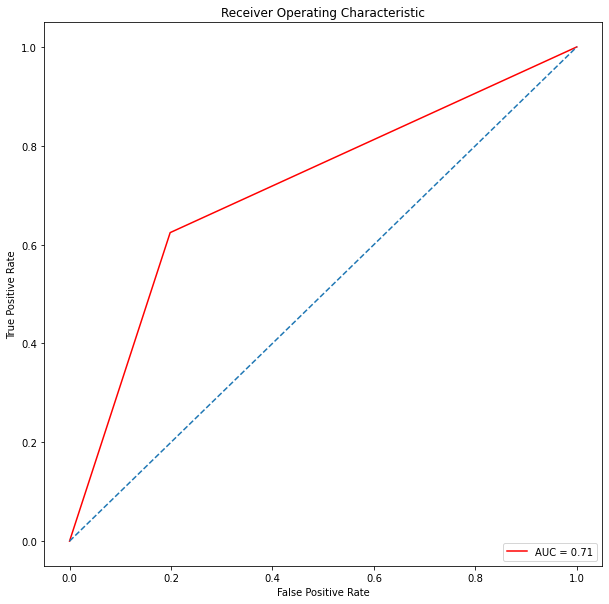

In [41]:
from sklearn.naive_bayes import GaussianNB
bayes = GaussianNB()
accuracy_bayes = cross_val_score(grad, x, y, cv=5, scoring='accuracy')
y_out = cross_val_predict(bayes, x, y, cv=5)
#Report 
report_bayes = metrics.classification_report(y, y_out)

#Plot confusion matrix
# Not normalized
cm = metrics.confusion_matrix(y, y_out)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm, outcomes)

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_out)
roc_auc_bayes = auc(false_positive_rate, true_positive_rate)

# Plot ROC 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc_bayes)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


from sklearn.metrics import average_precision_score
average_precision_bayes = average_precision_score(y, y_out)

print(report_bayes)
print('Average accuracy of tree:', np.average(accuracy_bayes))
print ("Area under the ROC", roc_auc_bayes)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision_bayes))

Text(0.5, 0, 'Cross validation')

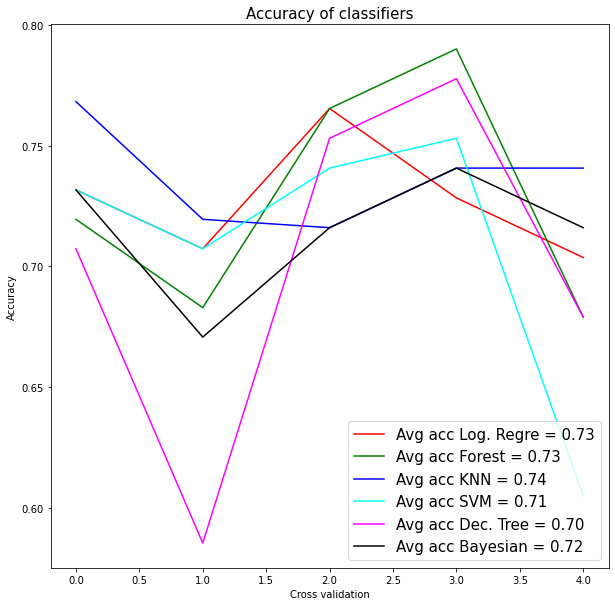

In [60]:
# Plot accuracy of three ensemble models
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Accuracy of classifiers', fontsize = 15)
plt.plot(accuracy_reg2, color='red',label = 'Avg acc Log. Regre = %0.2f' % np.average(accuracy_reg2))
plt.plot(accuracy_forest, color='green',label = 'Avg acc Forest = %0.2f' % np.average(accuracy_forest))
plt.plot(accuracy_knn, color='blue',label = 'Avg acc KNN = %0.2f' % np.average(accuracy_knn))
plt.plot(accuracy_svm, color='cyan',label = 'Avg acc SVM = %0.2f' % np.average(accuracy_svm))
plt.plot(accuracy_tree, color='magenta',label = 'Avg acc Dec. Tree = %0.2f' % np.average(accuracy_tree))
plt.plot(accuracy_bayes, color='black',label = 'Avg acc Bayesian = %0.2f' % np.average(accuracy_bayes))
plt.legend(loc = 'lower right', fontsize=15)
plt.axis('tight')
plt.ylabel('Accuracy')
plt.xlabel('Cross validation')
